In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
import time
from sklearn import *

In [2]:
from mnist import MNIST

mndata = MNIST(r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!Semesters\2nd Sem\Courses\CS 559 NN\Homeworks\HW2\Q2\data\t")

xtrain, ytrain = mndata.load_training()
xtest, ytest = mndata.load_testing()
xtrain = np.reshape(xtrain,(60000,784))
xtest = np.reshape(xtest,(10000,784))
ytrain = np.reshape(ytrain,(60000,1))
ytest = np.reshape(ytest,(10000,1))
xtrain = (xtrain)/255
xtest = (xtest)/255
xtrain.shape




(60000, 784)

In [3]:
x_train = []
x_test = []
for i in range(len(xtrain)):
    x_train.append(np.append(xtrain[i],1))

for i in range(len(xtest)):
    x_test.append(np.append(xtest[i],1))
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)



In [4]:
# x_test1 = pd.DataFrame(data = x_test.reshape(len(x_test),785))
# ytest1 = pd.DataFrame(data = ytest.reshape(len(ytest),1))

In [5]:
# x_test1.head()

In [6]:
# x=[1,1]
# np.linalg.norm(x)

In [7]:
ytrain

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [8]:
# x =[[0,1, 1],[1,0, 0],[1,1, 0], [0,0, 0]]
# y=[4,1,2,3]
# x = np.asarray(x)
# y = np.asarray(y)

d = np.zeros(shape = (len(xtrain),10))

for i in range(len(ytrain)):
    d[i][ytrain[i]] = 1

dt = np.zeros(shape = (len(xtest),10))
for i in range(len(ytest)):
    dt[i][ytest[i]] = 1

# d = np.zeros(shape = (len(x),10))
# for i in range(len(y)):
#     d[i][y[i]] = 1
# xtrain = x
# xtrain
d[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [9]:
# # # d = np.zeros(shape = (len(xtrain),10))
# # # for i in range(len(ytrain)):
# # #     d[i][ytrain[i]] = 1

# # # dt = np.zeros(shape = (len(xtest),10))
# # # for i in range(len(ytest)):
# # #     dt[i][ytest[i]] = 1

# # #w = random.normal(size = (10,784))

# d = np.zeros(shape = (len(xtrain)))
# for i in range(len(ytrain)):
#     d[i] = ytrain[i][0]

# dt = np.zeros(shape = (len(xtest)))
# for i in range(len(ytest)):
#     dt[i] = ytest[i][0]

In [10]:
d

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [11]:
a = [[1.5, 2.5], [2.6, 3.3]]
np.around(a)

array([[2., 2.],
       [3., 3.]])

In [12]:
# weights = np.random.uniform(low =-2, high = 2, size = (784, 60000))
# np.matmul(weights, x_train)

In [13]:
d

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
# t = np.asarray([1,2,3])*(np.asarray([4,5,6]))
# t

In [15]:
a=np.asarray([[1,2,3], [4,5,6]])
print(a[:-1])
c = np.asarray([[7,8,9]])
b =np.append(a,c, axis=0)
b

[[1 2 3]]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [20]:
class Neural_Network():
    
    def __init__(self, x=[[]], y=[], p=[[]], q=[], nHiddenLayers = 0, nHiddenNodes =0, numOutputs = 0, eta = 1, iter = 0, prec = 0):
        self.data = x
        self.labels = y
        self.test = p
        self.testlabels = q
        self.nInputNodes = x.shape[1]
        self.nHiddenLayers = nHiddenLayers
        self.nHiddenNodes = nHiddenNodes
        self.numOutputs = numOutputs
        self.eta = eta
        self.maxIt = iter
        self.prec = prec
        self.weights=[np.random.uniform(low = -1, high = 1, size = (self.nHiddenNodes, self.nInputNodes))]
        for i in range(self.nHiddenLayers-1):
            self.weights.append(np.random.uniform(low =-1, high = 1, size =(self.nHiddenNodes, self.nHiddenNodes+1))) 
        self.weights.append(np.random.uniform(low =-1, high = 1, size = (self.numOutputs, self.nHiddenNodes+1)))

    # Sigmoid activation function for all layers except the output layer
    def sigmoid(self, s):      
        return 1/(1+np.exp(-s))

    # Derivative of sigmoid for all layers except the output layer
    def sigmoidPrime(self, s):
        return s * (1 - s)

    # Activation function for all the input data
    def af_predict(self,s): 
#         t = 1/(1+np.exp(-s))
        p =[]
        for i in range(len(s)):
            max = np.argmax(s[i])
            y = np.zeros(len(s[i]))
            y[max] = 1
            p.append(y)
        return np.asarray(p)
    
    # Activation function for the output layer of the feedforward graph
    def af(self,s):
#         t = 1/(1+np.exp(-s))
        max = np.argmax(s[0])
        y = np.zeros(self.numOutputs)
        y[max] = 1
#         temp = np.asarray(y).reshape(1,self.numOutputs)
        return np.asarray(y)        
    
#     def decision_A(self,x):
#         out =[]
# #         print(x.shape)
# #         print(f)
#         for i in range(x.shape[0]):
#             s =np.zeros(x.shape[1])            
#             max = np.argmax(x[i])
#             #print(max)
#             s[max] = 1
#             out.append(s)
#         out = np.asarray(out)
#         print(out.shape)
#         print(f)
#         return out

    def misclassifications(self, x,y):
        count = 0
        for i in range(y.shape[0]): 
            if np.any(x[i]-y[i]):
                count += 1                
        return count
    
    def predict(self, data=[]):
        prev = data.T
             
        for i in range(len(self.weights)-1):
            temp = (np.matmul(self.weights[i], prev))
            temp2 = self.sigmoid(temp)
            y=[np.ones(temp2.shape[1])]
            prev = np.append(y, temp2, axis = 0)
#             print(prev.shape)
#             print(f)
        temp_f = np.matmul(self.weights[self.nHiddenLayers], prev)
        temp4 = self.af_predict(np.transpose(temp_f))
        return temp4
    
    def feedforward(self, x):
#         print(x)
        self.r = []
        self.r.append(x)
#         print(self.r)
#         print(f)
        prev = x.T        
        for i in range(len(self.weights)-1):
#             print(self.weights[i])
#             print(prev)
            temp = np.matmul(self.weights[i], prev)
#             print(temp)
            temp2 = self.sigmoid(temp)
            prev = np.append([[1]], temp2).reshape(temp2.shape[0]+1,1)
#             print(prev.shape)
#             print(f)
            self.r.append(prev)
#             print(self.r)
#             print('\n')
            
#         print(self.weights[self.nHiddenLayers])
#         print(prev)
        temp_f = np.matmul(self.weights[self.nHiddenLayers], prev)
        temp4 =self.af(temp_f.T)
        return temp4

    def backward(self, x, y):
        self.gradient=[]
#         print(x)
#         print(y)
#         print(f)
        o = self.feedforward(x)
#         print(o)
        self.out_error = y - o
#         print(self.out_error)
#         print(f)

        for i in reversed(range(len(self.weights))):
            if i == 0 and i != len(self.weights)-1:
                temp2 = temp.T.dot(self.weights[i+1]).T
#                 print(self.sigmoidPrime(self.r[i+1]))
                temp3 = temp2*self.sigmoidPrime(self.r[i+1])
                temp4 = (temp3.dot(self.r[i]))*2/len(self.data)
#                 print('w')
#                 print(self.weights[i])
#                 print((self.eta*temp4*2)/len(self.data))
                self.gradient.append(self.eta*1.5*temp4[1:])
                    
            elif i > 0 and i<len(self.weights)-1:
                temp2 = temp.T.dot(self.weights[i+1]).T
                
#                 print(self.sigmoidPrime(self.r[i+1]))
                temp3 = temp2*self.sigmoidPrime(self.r[i+1])
#                 print(temp3.shape)
                temp4 = (temp3.dot(self.r[i].T))*2/len(self.data)
#                 print('w')
#                 print(self.weights[i])
#                 print((self.eta*temp4*2)/len(self.data))
                self.gradient.append(self.eta*1.5*temp4[1:])
                temp = temp3[1:]
                    
            elif i == len(self.weights)-1:
#                 print(self.weights)
#                 print(self.out_error)
#                 print(o)
#                 print(self.af_derivative(o).T)
                temp = self.out_error.reshape(self.numOutputs,1)
#                 print(temp.shape)
#                 print(f)
#                 print(self.weights[i])
                temp2 = self.r[i].dot(temp.T)*2/len(self.data)
                self.gradient.append(self.eta*temp2.T)
#                 print(self.weights[i])
#                 print('\n')

        self.gradient = self.gradient[::-1]
    
        for i in range(len(self.weights)):
            self.weights[i] += self.gradient[i]
#         print(self.weights)
#         print(f)

    def train (self):        
        #print(self.eta)
#         print(self.weights[0].shape)
#         print(f)
        e = 0
        obj_training =[]
        obj_testing = []
        epoch = []
        mis_training = []
        mis_testing =[]
        epoch.append(e)
        pred_train = self.predict(self.data)
        pred_test = self.predict(self.test)
        obj_training.append(((np.linalg.norm(self.labels - pred_train))**2)/len(self.data))
        obj_testing.append(((np.linalg.norm(self.testlabels - pred_test))**2)/len(self.test))
        mis_training.append(self.misclassifications(self.labels, pred_train))
        mis_testing.append(self.misclassifications(self.testlabels, pred_test))
        mse = 100000000000
#         while e <= self.maxIt and mse >= self.prec:
        while e <= self.maxIt:
            prev = mse
#             print(prev)
#             print(f)
            e += 1
            for i in range(len(self.data)):
                self.backward(self.data[i].reshape(1,self.nInputNodes), self.labels[i])                
#                 print(self.delta)
#             print(self.weights)
#             print(f)                
#             print('after')
#             print(self.weights)
            pred_train = self.predict(self.data)
            pred_test = self.predict(self.test)
            mse = ((np.linalg.norm(self.labels - pred_train))**2)/len(self.data)
            mse_test = ((np.linalg.norm(self.testlabels - pred_test))**2)/len(self.test)
#             print(mse)
#             print(f)            
            obj_training.append(mse)
            obj_testing.append(mse_test)
            epoch.append(e)
            mis_training.append(self.misclassifications(self.labels, pred_train))
            mis_testing.append(self.misclassifications(self.testlabels, pred_test))
            if mse >= prev:
                self.eta = 0.7*self.eta
            prev = mse
        return self.weights, epoch, obj_training, mis_training, obj_testing, mis_testing

# Hyperparameter Selection

In [ ]:
# nHiddenLayers = 1
# nHiddenNodes =2
# numOutputs = 10
# eta = 1
# iter = 100
# prec = 1.6
#print(xtrain.shape)

hid = [1]
hidnodes= [16]
lrate = [10]
a =[]
b =[]
c=[]
q =[]

weights =[]
iter = 10
numOutputs = 10
prec = 0.2
for i in hid:
    for j in hidnodes:
        for k in lrate:
            print([i,j,k])            
            NN = Neural_Network(x_train, d, x_test, dt, i, j, numOutputs, k, iter, prec)
            w, epoch, obj_training, mis_training, obj_testing, mis_testing = NN.train()
            weights.append(w)
            a.append(obj_training)
            b.append(mis_training)
            c.append(obj_testing)
            q.append(mis_testing)

[1, 16, 10]


In [ ]:
fig, ax = plt.subplots(4,2,figsize = (20,10))

# for i in range(len(hid)):
#     for j in range(len(hidnodes)):
#         for k in range(len(lta)):
k = 0
for i in range(4):
    for j in range(2):              
        ax[i,j].plot(epoch,a[k], label='Training', c='r')
        ax[i,j].plot(epoch, c[k], c='y',label='Testing')
        ax[i,j].legend()
        k += 1        

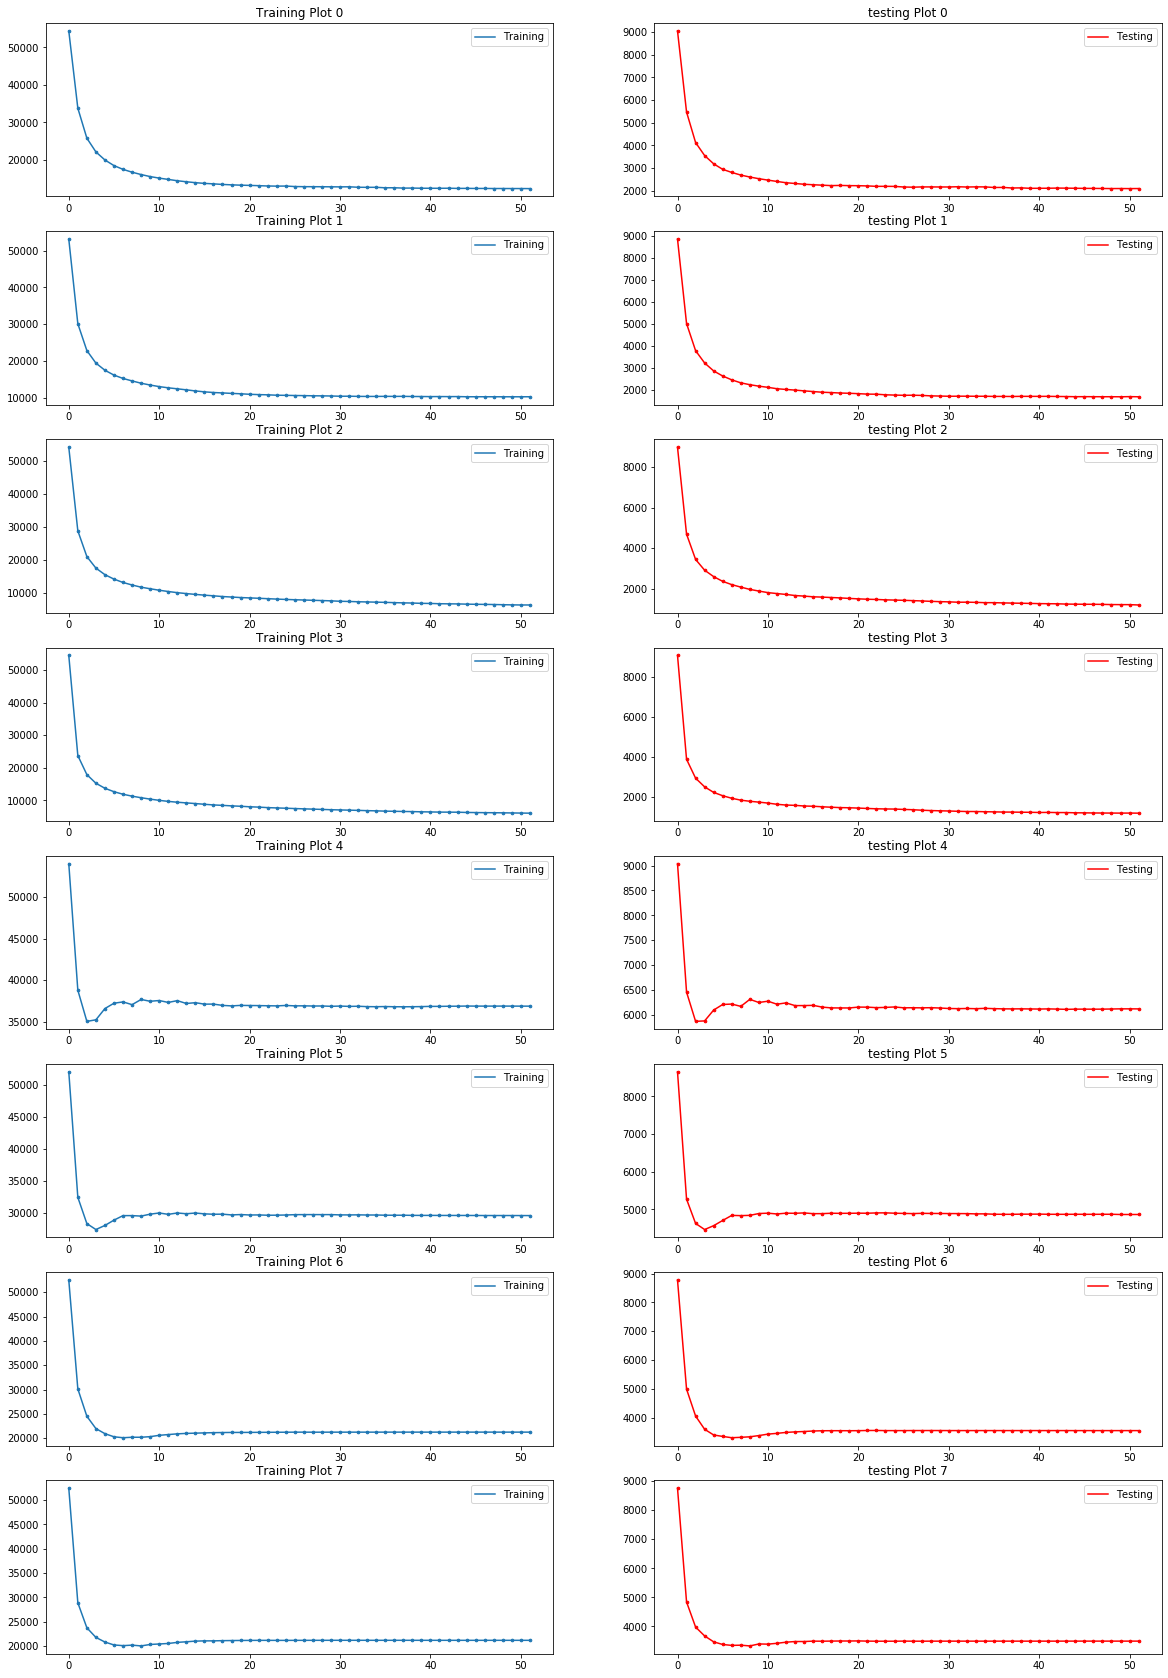

In [307]:
fig, ax = plt.subplots(8,2,figsize = (20,30))
k = 0
i = 0
p=0
while i < 8:
    ax[i,0].scatter(epoch,b[k], s  = 7)
    ax[i,0].plot(epoch,b[k], label='Training')
    ax[i,0].legend()
    ax[i,0].title.set_text('Training Plot ' + str(k))

    ax[i,1].scatter(epoch,q[k], s  = 7, c ='r')
    ax[i,1].plot(epoch, q[k], c='r',label='Testing')
    ax[i,1].legend()
    ax[i,1].title.set_text('testing Plot ' + str(k))
    i += 1
    k += 1

In [280]:

# fig, ax = plt.subplots(figsize = (20,5))
# plt.scatter(epoch,mis_training, s  = 7)
# plt.plot(epoch,mis_training, label = 'training')
# plt.title('Legend inside')
# plt.show()

# fig, ax = plt.subplots(figsize = (20,5))
# plt.scatter(epoch,mis_testing, s  = 7, c ='r')
# plt.plot(epoch,mis_testing, c='r',label='Testing')
# plt.title('Legend inside')
# ax.legend()

# plt.xlabel("Epoch")
# plt.ylabel("MISC")
# plt.title('Plot: the number of epochs vs the misclassifications')
# plt.show()

In [ ]:

# fig, ax = plt.subplots(4,2,figsize = (20,5))

# # for i in range(len(hid)):
# #     for j in range(len(hidnodes)):
# #         for k in range(len(lta)):
            
# plt.scatter(epoch,obj_training, s  = 7)
# plt.scatter(epoch,obj_testing, s  = 7, c ='r')

# ax[0,0].plot(epoch,obj_training, label='Training')
# ax[0,0].plot(epoch,obj_testing, c='r',label='Testing')
# plt.title('Legend inside')
# ax.legend()


# plt.xlabel("Epoch")
# plt.ylabel("MSE")
# plt.title('Plot: the number of epochs vs the MSE')
# plt.show()